In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog, local_binary_pattern


In [2]:

# --- Load Image from Local File ---
image_path = "pikachu.jpg"  # Change this to your local image path
image = cv2.imread(image_path)

# Check if the image is loaded
if image is None:
    raise FileNotFoundError(f"Image file '{image_path}' not found. Check the path.")


In [3]:
# Convert to Grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [7]:

# --- HOG Feature Extraction ---
hog_features, hog_image = hog(image_gray, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')


In [8]:

# --- LBP Feature Extraction ---
radius = 1  # LBP radius
n_points = 8 * radius  # Number of sample points
lbp_image = local_binary_pattern(image_gray, P=n_points, R=radius, method="uniform")


In [9]:

# --- Edge Detection (Canny & Sobel) ---
edges_canny = cv2.Canny(image_gray, 100, 200)  # Canny Edge Detection
edges_sobel = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=5)  # Sobel Edge Detection

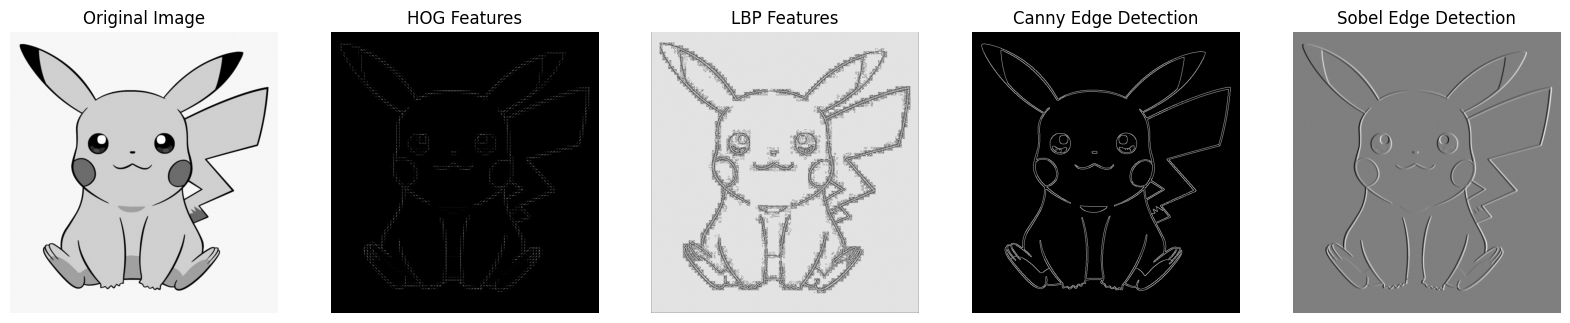

In [10]:
# --- Display Results ---
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

axes[0].imshow(image_gray, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(hog_image, cmap='gray')
axes[1].set_title("HOG Features")
axes[1].axis("off")

axes[2].imshow(lbp_image, cmap='gray')
axes[2].set_title("LBP Features")
axes[2].axis("off")

axes[3].imshow(edges_canny, cmap='gray')
axes[3].set_title("Canny Edge Detection")
axes[3].axis("off")

axes[4].imshow(edges_sobel, cmap='gray')
axes[4].set_title("Sobel Edge Detection")
axes[4].axis("off")

plt.show()
